In [1]:
import numpy
import csv
import re
import pandas as pd
b = './'
path_value = b + r"data - eurusd.csv"
data = pd.read_csv(path_value, names=['Text', 'Date', 'Time'], usecols=[5, 6, 7])
data

,Text,Date,Time
0,И хоть покупатели европейской валюты частично ...,02.06.2022,13:56
1,"Не говори гоп, пока не перепрыгнешь. Шестой па...",02.06.2022,13:55
2,Как сообщили в среду в Институте управления сн...,02.06.2022,13:07
3,Свято место пусто не бывает. Уход с российског...,02.06.2022,12:57
4,Банк Канады по итогам июньского заседания повы...,02.06.2022,12:38
...,...,...,...
5996,Сегодня основные мировые торговые площадки зак...,10.04.2020,09:52
5997,\n\nКоррекционный рост нефти выдохся: нефть сн...,10.04.2020,09:15
5998,\n\nВ четверг 9 апреля Россия и Саудовская Ара...,10.04.2020,08:54
5999,Сегодня многие торговые площадки мира закрыты ...,10.04.2020,08:26


In [2]:
import warnings
warnings.filterwarnings("default")

In [3]:
a = pd.ExcelFile(b + "currencies_fixed_4.xlsx")
tables = []
for sheet in a.sheet_names:
    tables.append(pd.read_excel(b + "currencies_fixed_4.xlsx", sheet))

In [4]:
result_table = pd.concat(tables)

In [5]:
clearTable = result_table[(result_table['Nearest Closing Time'] != '-') & (result_table['Text RU'] != '-')]

In [6]:
clearTable.rename(columns={'Text RU': 'Text'}, inplace=True)

clearTable['Text'] = clearTable['Text'].map(lambda x: re.sub('[^А-Яа-я ]', " ", x))
new_text = data['Text'].map(lambda x: re.sub('[^А-Яа-я ]', " ", x))
data['Text'] = new_text
clearTable['Text'].iloc[0]

C:\Users\Андрей\AppData\Local\Temp\ipykernel_2640\3945082973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clearTable.rename(columns={'Text RU': 'Text'}, inplace=True)
C:\Users\Андрей\AppData\Local\Temp\ipykernel_2640\3945082973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clearTable['Text'] = clearTable['Text'].map(lambda x: re.sub('[^А-Яа-я ]', " ", x))


'Австралийский доллар испытывает давление как в паре с американской валютой  так и в основных кросс парах  Фундаментальная картина и технический анализ говорят о приоритете коротких позиций  особенно в краткосрочном периоде  Несмотря на общее ослабление австралийского доллара  в каждом случае есть свои причины южного движения  которые необходимо учитывать при открытии торговых позиций  Фаворитом сегодняшнего дня можно считать японскую иену  Неожиданное решение Банка Японии о сокращении объема покупок долгосрочных гособлигаций  мягко говоря  удивило рынок  Ведь на последнем заседании регулятор ни словом не обмолвился о предстоящих изменениях  Как и на всех предыдущих заседаниях  Центробанк заверял рынок в том  что будет придерживаться мягкой монетарной политики ещ   долгое время   А осенью Курода даже обозначил ориентировочный горизонт  по его словам  целевой уровень инфляции будет достигнут  лишь через годы   поэтому говорить о каких либо изменениях ещ  рано  Впрочем  Банк Японии в оче

In [7]:
import datetime
data['Date'] = data['Date'].map(lambda x: datetime.datetime.strptime(x, "%d.%m.%Y").date())
top4 = clearTable[(clearTable['Currency'] == 'EUR/USD') | (clearTable['Currency'] == 'GBP/USD') | (clearTable['Currency'] == 'EURUSD') | (clearTable['Currency'] == 'AUD/USD')]
superTable = top4[['Currency', 'Text', 'Nearest Closing Time']]
superTable['Nearest Closing Time'] = superTable['Nearest Closing Time'].map(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d%H%M").date())
data['Date'].map(lambda x: x.year).value_counts(), superTable['Nearest Closing Time'].map(lambda x: x.year).value_counts()

C:\Users\Андрей\AppData\Local\Temp\ipykernel_2640\3287842341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superTable['Nearest Closing Time'] = superTable['Nearest Closing Time'].map(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d%H%M").date())


(2021    2544
 2020    2178
 2022    1279
 Name: Date, dtype: int64,
 2020    1357
 2021     688
 2019     311
 2018      46
 2017       4
 Name: Nearest Closing Time, dtype: int64)

In [8]:
audusd = b + r"AUDUSD_170101_220818.txt"
gbpusd = b + r"GBPUSD_170101_220818.txt"
eurusd = b + r"EURUSD_170101_220818.txt"

In [9]:
aud = pd.read_csv(audusd, sep=',')
gbp = pd.read_csv(gbpusd, sep=',')
eur = pd.read_csv(eurusd, sep=',')

In [10]:
for i in [aud, gbp, eur]:
    i['<DATE>'] = i['<DATE>'].map(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").date())
    i.drop(['<TIME>', '<TICKER>', '<PER>', '<HIGH>', '<LOW>', '<VOL>'], axis=1, inplace=True)
    i['Target'] = (i['<CLOSE>'] > i['<OPEN>']).apply(lambda x: int(x))
    i.drop(['<OPEN>', '<CLOSE>'], axis=1, inplace=True)
    i.rename(columns={'<DATE>':'Date'}, inplace=True)

In [11]:
data['Currency'] = 'EUR/USD'
superTable.rename(columns={'Nearest Closing Time': 'Date'}, inplace=True)
data = pd.concat([data, superTable])

C:\Users\Андрей\AppData\Local\Temp\ipykernel_2640\579474462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superTable.rename(columns={'Nearest Closing Time': 'Date'}, inplace=True)


In [12]:
eData = data[(data['Currency'] == 'EUR/USD') | (data['Currency'] == 'EURUSD')]
aData = data[(data['Currency'] == 'AUD/USD')]
gData = data[data['Currency'] == 'GBP/USD']
e = eData.set_index('Date').join(eur.set_index('Date'), on='Date')
a = aData.set_index('Date').join(aud.set_index('Date'), on='Date')
g = gData.set_index('Date').join(gbp.set_index('Date'), on='Date')
final_data = pd.concat([e, a, g])
final_data['Text'] = final_data['Text'].map(lambda x: x.lower())
final_data.drop(['Currency', 'Time'], axis=1, inplace=True)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [14]:
final_data = final_data.drop_duplicates('Text')
final_data_without_na = final_data[final_data['Target'].notna()]
final_data_without_na['Target'].value_counts()
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
russian_stopwords = stopwords.words('russian')
final_data_without_na['Text'] = final_data_without_na['Text'].apply(lambda x:\
                            ' '.join([word for word in x.split() if word not in russian_stopwords]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Андрей\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Андрей\AppData\Local\Temp\ipykernel_2640\886668786.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_without_na['Text'] = final_data_without_na['Text'].apply(lambda x:\


In [15]:
X, y = final_data_without_na['Text'], final_data_without_na['Target']

In [16]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, train_size=0.85, random_state=1)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv_bigram, cv_word = CountVectorizer(ngram_range=(2,2)), CountVectorizer(ngram_range=(1,1))
tfid_bigram, tfid_word = TfidfVectorizer(ngram_range=(2, 2)), TfidfVectorizer(ngram_range=(1, 1), max_df=0.3)

X, X1, X_cv_bigram, X_cv_word = tfid_bigram.fit_transform(x_train), tfid_word.fit_transform(x_train), cv_bigram.fit_transform(x_train), cv_word.fit_transform(x_train)
X_test, X_test1, X_test_cv_bigram, X_test_cv_word = tfid_bigram.transform(x_valid), tfid_word.transform(x_valid), cv_bigram.transform(x_valid), cv_word.transform(x_valid)

# Some visualisations

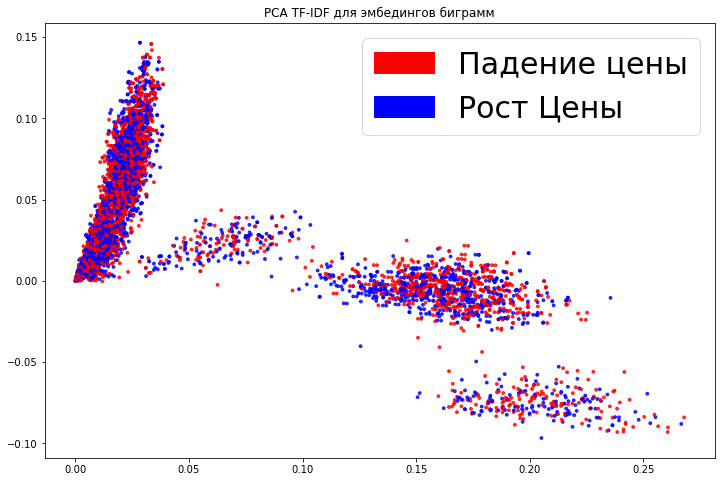

In [18]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt 


def plot_LSA(test_data, test_labels, title, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['red','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='Red', label='Падение цены')
            green_patch = mpatches.Patch(color='Blue', label='Рост Цены')
            plt.title(title)
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(12, 8))          
plot_LSA(X, y_train, 'PCA TF-IDF для эмбедингов биграмм')
plt.show()

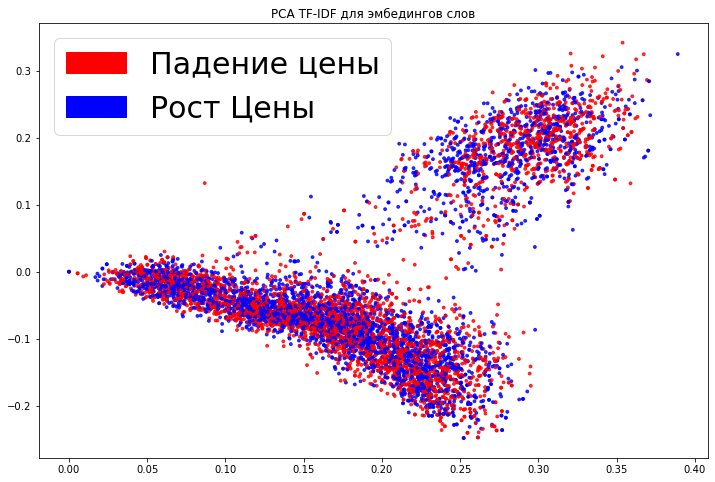

In [19]:
plt.figure(figsize=(12, 8))
plot_LSA(X1, y_train, 'PCA TF-IDF для эмбедингов слов')
plt.show()

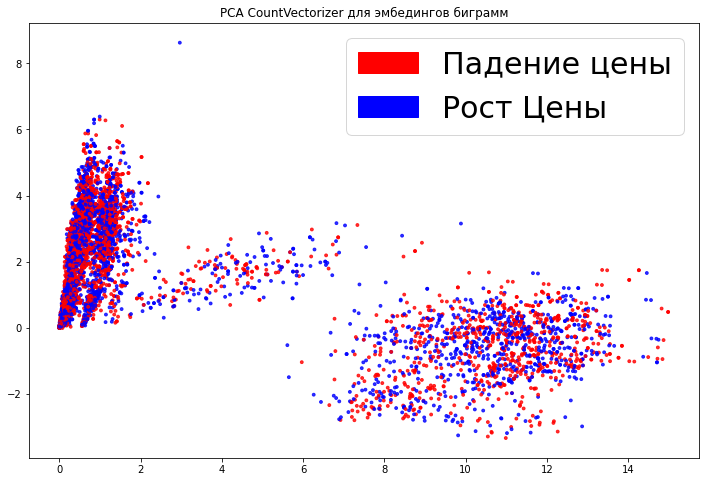

In [20]:
plt.figure(figsize=(12, 8))
plot_LSA(X_cv_bigram, y_train, 'PCA CountVectorizer для эмбедингов биграмм')
plt.show()

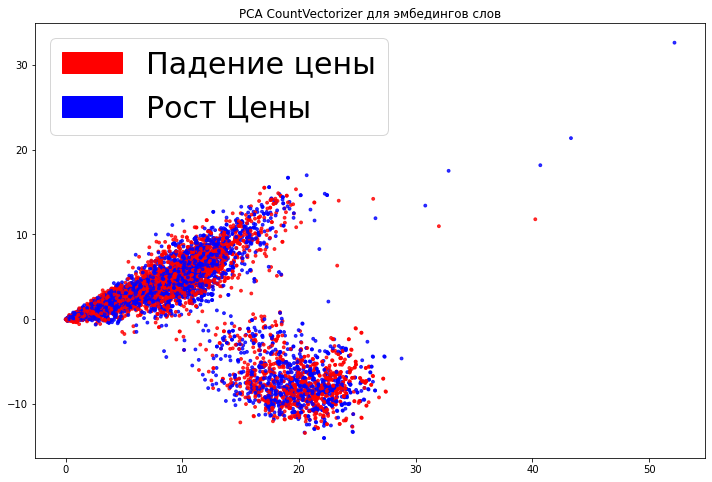

In [21]:
plt.figure(figsize=(12, 8))
plot_LSA(X_cv_word, y_train, 'PCA CountVectorizer для эмбедингов слов')
plt.show()

# Cross-validation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(2, 2))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe1 = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(1,1))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe2 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(1,1))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe3 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(2,2))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
param_grid = { 
    
        'SGD__alpha': [ 10 ** i for i in range(-5, 3) ]
}
crs = GridSearchCV(pipe,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(accuracy_score))
crs1 = GridSearchCV(pipe1,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(accuracy_score))
crs2 = GridSearchCV(pipe2,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(accuracy_score))
crs3 = GridSearchCV(pipe3,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(accuracy_score))
crs.fit(final_data_without_na['Text'], final_data_without_na['Target'])
crs1.fit(final_data_without_na['Text'], final_data_without_na['Target'])
crs2.fit(final_data_without_na['Text'], final_data_without_na['Target'])
crs3.fit(final_data_without_na['Text'], final_data_without_na['Target'])

In [ ]:
crs.best_score_, crs.best_params_, crs1.best_score_, crs1.best_params_,crs.best_score_, crs2.best_params_,crs3.best_score_, crs3.best_params_

# SGD

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
best = SGDClassifier(alpha=0.0001)
best1 = SGDClassifier(alpha=1e-05, n_jobs=1, random_state=12)
best2 = SGDClassifier(alpha=1e-05, n_jobs=1, random_state=12)
best3 = SGDClassifier(alpha=0.01, n_jobs=1, random_state=12)
best.fit(X, y_train), best1.fit(X1, y_train), best2.fit(X_cv_bigram, y_train), best3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {accuracy_score(best.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(best1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(best2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(best3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.6358520900321544
TF-IDF word 0.6463022508038585
CountVectorizer bigram 0.6310289389067524
CountVectorizer word 0.639871382636656


C:\Users\Andrei\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Андрей\AppData\Roaming\Python\Python39\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:title={'center':'Confusion matrix для биграмм'}>

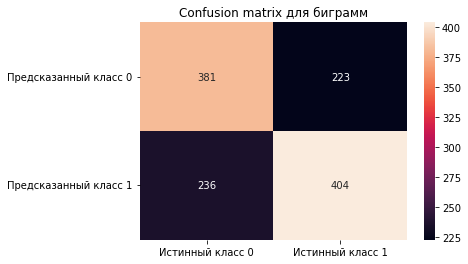

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np 
plt.title('Confusion matrix для биграмм')
sns.heatmap(pd.DataFrame(confusion_matrix(best2.predict(X_test_cv_bigram), y_valid.astype(np.int64)),\
                        columns=['Истинный класс 0', 'Истинный класс 1'], index=['Предсказанный класс 0', \
                               'Предсказанный класс 1']), annot=True, fmt='')

<AxesSubplot:title={'center':'Confusion matrix для слов'}>

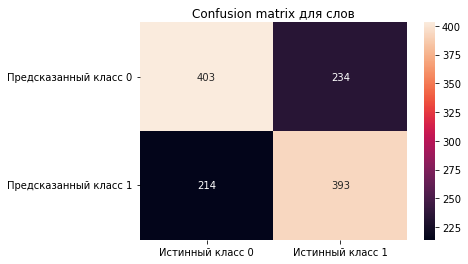

In [24]:
plt.title('Confusion matrix для слов')
sns.heatmap(pd.DataFrame(confusion_matrix(best3.predict(X_test_cv_word), y_valid.astype(np.int64)),\
                        columns=['Истинный класс 0', 'Истинный класс 1'], index=['Предсказанный класс 0', \
                               'Предсказанный класс 1']), annot=True, fmt='')

<AxesSubplot:title={'center':'Confusion matrix для биграмм'}>

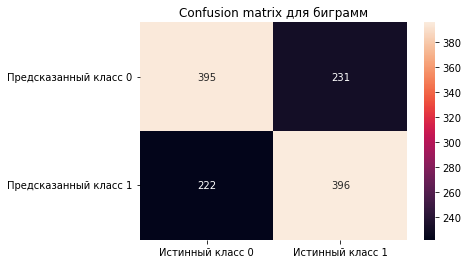

In [25]:
plt.title('Confusion matrix для биграмм')
sns.heatmap(pd.DataFrame(confusion_matrix(best.predict(X_test), y_valid.astype(np.int64)),\
                        columns=['Истинный класс 0', 'Истинный класс 1'], index=['Предсказанный класс 0', \
                               'Предсказанный класс 1']), annot=True, fmt='')

<AxesSubplot:title={'center':'Confusion matrix для слов'}>

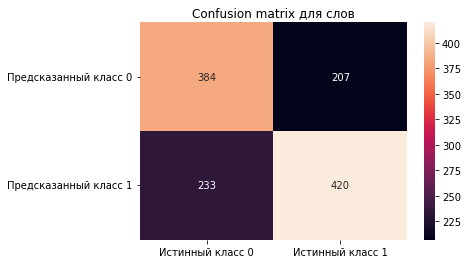

In [26]:
plt.title('Confusion matrix для слов')
sns.heatmap(pd.DataFrame(confusion_matrix(best1.predict(X_test1), y_valid.astype(np.int64)),\
                        columns=['Истинный класс 0', 'Истинный класс 1'], index=['Предсказанный класс 0', \
                               'Предсказанный класс 1']), annot=True, fmt='')

In [27]:
import matplotlib.pyplot as plt 
import numpy as np 
def visualize_coefficients(classifier, feature_names, name, n_top_features=25):
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.title(f'Топ 25 слов в словаре эмоциональной окраски для {name}')
    plt.xticks(
        np.arange(1, 1 + 2 * n_top_features),
        feature_names[interesting_coefficients],
        rotation=60,
        ha="right",
    );

C:\Users\Андрей\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


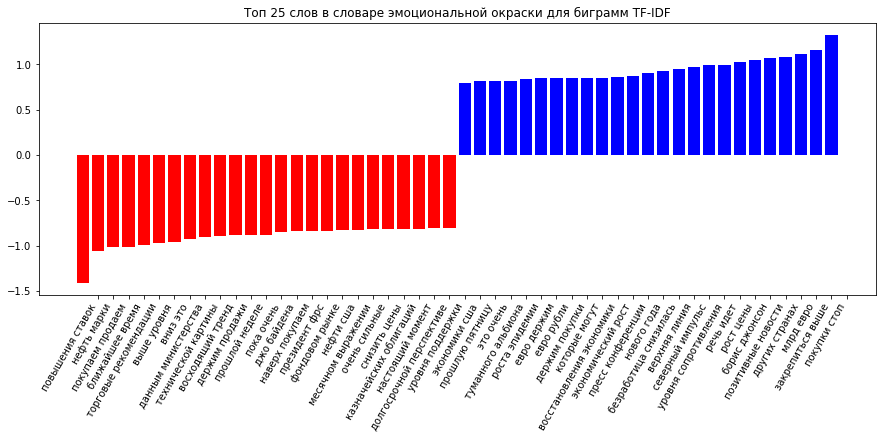

In [28]:
visualize_coefficients(best, tfid_bigram.get_feature_names(), 'биграмм TF-IDF')

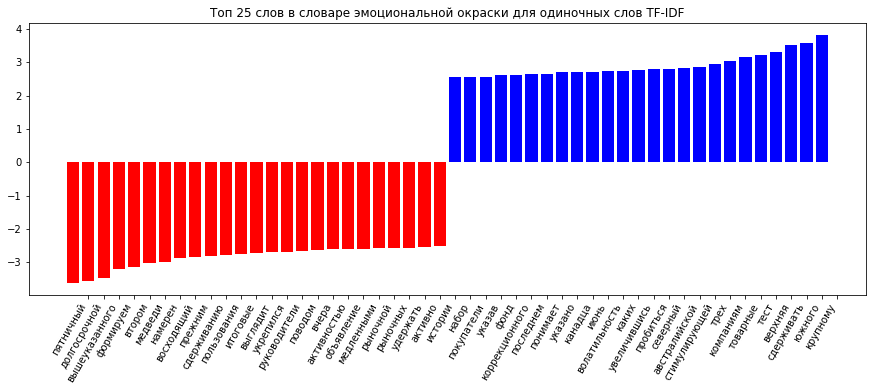

In [29]:
visualize_coefficients(best1, tfid_word.get_feature_names(), 'одиночных слов TF-IDF')

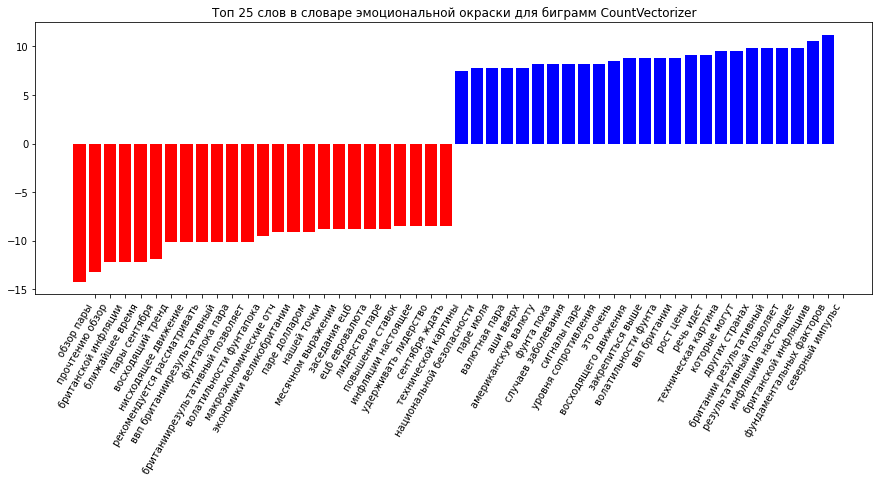

In [30]:
visualize_coefficients(best2, cv_bigram.get_feature_names(), 'биграмм CountVectorizer')

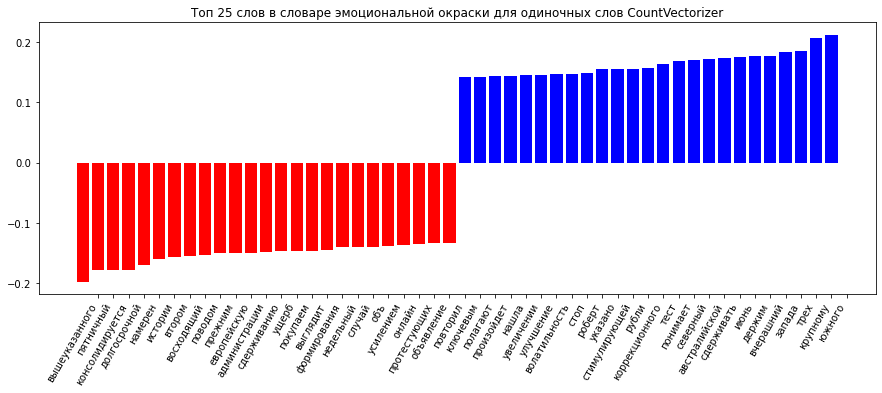

In [31]:
visualize_coefficients(best3, cv_word.get_feature_names(), 'одиночных слов CountVectorizer')

In [64]:
def save_dictionary(model, tfid, ngramm_name, path):
    coef = model.coef_.ravel() 
    feature_names = tfid.get_feature_names()
    indexes = np.argsort(coef)
    pd.DataFrame(np.vstack([np.array(feature_names)[indexes], sorted(coef)]).T, columns=[ngramm_name, 'Вес']).to_csv(path, sep=' ', index=None)
save_dictionary(best, tfid_bigram, 'Биграмма', b + 'bigrams_weights.csv')
save_dictionary(best1, tfid_word, 'Одиночное слово', b + 'words_weights.csv')

C:\Users\Андрей\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Андрей\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
coef = best.coef_.ravel() 
feature_names = tfid_bigram.get_feature_names()
indexes = np.argsort(coef)
aue = np.vstack([np.array(feature_names)[indexes], sorted(coef)])
aue.T

array([['повышения ставок', '-1.4067277025328397'],
       ['нефть марки', '-1.0628518225345414'],
       ['покупаем продаем', '-1.015704868347657'],
       ...,
       ['млрд евро', '1.120225372817423'],
       ['закрепиться выше', '1.1550415326213341'],
       ['покупки стоп', '1.3201935530541982']], dtype='<U41')

In [38]:
tfid_bigram.get_feature_names()

['ааа правительством',
 'аамериканский фондовый',
 'аарон браун',
 'аарона брауна',
 'аббас арагчи',
 'аббревиатура информационной',
 'аббревиатура общества',
 'абд аль',
 'абд раббух',
 'абдель азиз',
 'абдельмаджид аттар',
 'абдул джаббара',
 'абдул малик',
 'абдулазиз бен',
 'абдулазиз бин',
 'абдулазиз вдобавок',
 'абдулазиз выступая',
 'абдулазиз сказал',
 'абдулазиза бин',
 'абдулазиза снова',
 'абдулазиза указывает',
 'абдулла яхья',
 'абзац коротким',
 'абзаца выглядит',
 'абзаце важными',
 'абзаце значит',
 'абзаце попытаемся',
 'абзаце также',
 'абзацев учтены',
 'абзацем дело',
 'абкайке последний',
 'абортов рейтинг',
 'абразивной стороной',
 'абрамова объявлено',
 'абрамова четыре',
 'абрамович заявил',
 'абрамович касается',
 'абрамовичу российским',
 'абсолютная анархия',
 'абсолютная безоговорочная',
 'абсолютная неожиданность',
 'абсолютная неправда',
 'абсолютная паника',
 'абсолютная поддержка',
 'абсолютная правда',
 'абсолютная чушь',
 'абсолютно абсурдным',
 'абсо

# CATBOOST AND RANDOMFOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
rf = CatBoostClassifier(iterations=2500, loss_function='CrossEntropy', random_seed=228)
data_train, data_test = Pool(X, y_train), Pool(X_test)
rf.fit(data_train)
accuracy_score(rf.predict(data_test), y_valid)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rft = RandomForestClassifier()
rft.fit(X, y_train)
accuracy_score(rft.predict(X_test), y_valid)